## Research questions 4

In [2]:
import pandas as pd
import numpy as np
from numpy import histogram as hist
from PIL import Image
import matplotlib.pyplot as plt

In [9]:
df_profiles=pd.read_csv('/home/ec2-user/instagram_profiles.zip', sep='\t',usecols=['profile_id','n_posts'])

In [4]:
df_posts=pd.read_csv('/home/ec2-user/instagram_posts.zip', sep='\t',usecols=['cts','post_id','profile_id'])

### RQ4-FIRST QUESTION
-Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.-

the profile_id is assumed to be a float of the form   xxxxxxxxxxx.0   with an arbitrary number of digits x

In [11]:
def post_of_one_profile(profile_id,post_info):
    int_profile_id=int(profile_id)
    
    df_post_of_one_profile=post_info['post_id'].where(int_profile_id==post_info['profile_id'])
    df_post_time_of_one_profile=post_info['cts'].where(int_profile_id==post_info['profile_id'])
    
    profile_post=list(df_post_of_one_profile.dropna())
    list_post_time=list(df_post_time_of_one_profile.dropna())
          
    return  profile_post ,  list_post_time   

### RQ4-SECOND QUESTION
-Write another function that, given an input n (an integer), will return the posts that 
belong to the n top posted profiles (top n profiles that have posted the highest number of posts) 
that their data is available in the profile.csv using the previously written function.-

In [19]:
def top_n_profiles(profile_info,n):
    
    top_n_post_number=list(np.zeros(n,int))
    top_n_profile=list(np.zeros(n,int))
    counter_nth_profile=0
    
    for i in range(len(profile_info)):
        
        current_post_number=profile_info.loc[i][1]
        current_profile=profile_info.loc[i][0]
        
        if current_post_number>top_n_post_number[0]:
           j=1
           while  j<n  and current_post_number>top_n_post_number[j] :  
             j+=1
           top_n_post_number.insert(j,current_post_number)
           top_n_post_number.pop(0)
           top_n_profile.insert(j,current_profile)
           top_n_profile.pop(0)
           counter_nth_profile=0 
        elif current_post_number==top_n_post_number[0]:
           counter_nth_profile+=1  
    
    post_of_top_n=[]
    post_time_of_top_n=[]
    for i in range(n):
        post_of_top_i, post_time_i=post_of_one_profile(top_n_profile[i],df_posts)
        post_of_top_n.append(post_of_top_i)
        post_time_of_top_n.append(post_time_i)                                               
    
    top_n_post_number.reverse()
    top_n_profile.reverse()
    
    return  post_of_top_n, top_n_profile , top_n_post_number , post_time_of_top_n , counter_nth_profile


### RQ4-THIRD QUESTION
What is the average number of "likes" and comments of the top 10 profiles with 
the highest number of posts which their information is available in profile.csv?

###### ANSWER
in profile.cvs considering the record of a single generic profile there is no 
information about the "likes" and comments associated with its posts, indeed this information is contained in post.cvs.


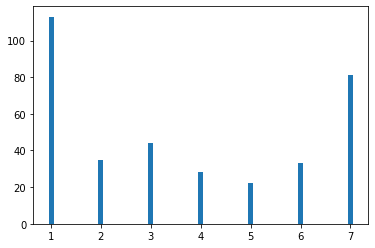

([33, 81, 113, 35, 44, 28, 22], 7)

In [31]:
'''
RQ4-FOURTH QUESTION
Plot the number of posts that these top 10 profiles have sent on 
Instagram in the given interval in question RQ3. Interpret the resulting chart
'''
input_intervals=['06:00:00','10:59:59','11:00:00','13:59:59','14:00:00','16:59:59','17:00:00','19:59:59','20:00:00','23:59:59','00:00:00','2:59:59','03:00:00','5:59:59']

post_of_top_10, top_10_profile , top_10_post_number , post_time_of_top_10 , counter_10th_profile=top_n_profiles(df_profile,10)

#THE FUNCTION function_RQ3 NEEDS AS INPUT A DATAFRAME
post_times_of_top_10=[]
for cts in post_time_of_top_10:
    post_times_of_top_10+=cts
post_times_of_top_10=pd.DataFrame(post_times_of_top_10, columns = ['cts'])

counter,num_intervals=function_RQ3(input_intervals,post_times_of_top_10)

In [2]:
print('Top 10 profile:')
print(top_10_profile)
print('Number of posts of the top 10 profiles:')
print(top_10_post_number)
print('Total number of post_id returned by top_n_profiles:')
print(sum(counter))  #counter is the list below the histogram

Top 10 profile:
[199664772.0, 8563366588.0, 1273455368.0, 9813508.0, 1607309412.0, 1087613619.0, 1603889832.0, 218172998.0, 285549744.0, 8312603412.0]
Number of posts of the top 10 profiles:
[183730.0, 142428.0, 126340.0, 125220.0, 117262.0, 117099.0, 113780.0, 113182.0, 112777.0, 112723.0]
Total number of post_id returned by top_n_profiles:
356


###### COMMENT
Considering the total number of posts that the top 10 profiles have posted, returned by 'top_n_profiles', 
it is much larger than the total number of post_id, related to these posts, found by 'top_n_profiles' 
using the function 'post_of_one_profile', assuming the correctness of the latter function, this indicates the presence 
of many missing values in the 'profile_id' record in the posts.cvs file, for this reason the information contained 
in the above histogram is not significant in relation to the total number of posts of the top 10 profiles.
